In [1]:
# Necessary libraries
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt

from pandas import read_csv
from scipy.interpolate import interp1d

In [2]:
## Read excel in data frame 
df = pd.read_csv('03-Oct-2023_patAnalysis_2.csv')

## Interpolation

time = df['wrist@(9mm,809nm)_delay_s'] 
print("Filtered  PAT:")
print(df['wrist@(9mm,809nm)_filtered_pat_bottomTI'].head())

print("Systolic blood pressure:  ")
print(df['blood pressure_systolic'].head())

Filtered  PAT:
0         NaN
1         NaN
2    0.291140
3    0.293449
4    0.295763
Name: wrist@(9mm,809nm)_filtered_pat_bottomTI, dtype: float64
Systolic blood pressure:  
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: blood pressure_systolic, dtype: float64


In [3]:
def interpolate(col_name):
    # Removing columns with NaN in the  coloumn
    data_squashed = df.dropna(subset=[col_name])
    # Interpolation function applied to filtered pat linear =specifying linear interpolation
    interp_func = interp1d(data_squashed['wrist@(9mm,809nm)_delay_s'].array, data_squashed[col_name].array, kind='linear', fill_value="extrapolate")
    # Applying the interpolation function to the timme series
    continuous_values = interp_func(time)
    return continuous_values

In [4]:
PAT_filt_int = interpolate('wrist@(9mm,809nm)_filtered_pat_bottomTI')


[22.3936 24.0604 25.6678 27.1942 28.699  30.274  31.9336 33.676  35.4544
 37.2454 39.0076 40.7356 42.4132 44.0278 45.6082 47.1382 48.6502 50.1442
 51.6148 53.1178 54.628  56.1508 57.6628 60.6202 62.1268 63.6676 65.2786
 66.9526 68.6734 70.3906]


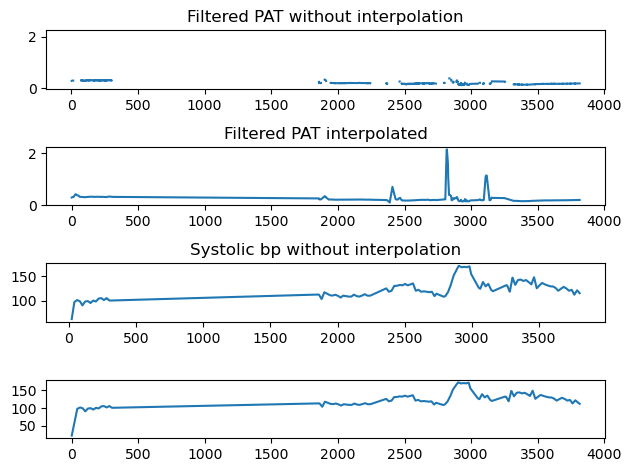

In [7]:
fig = plt.figure(1)
plt.subplot(4,1,1)
plt.plot(time,df['wrist@(9mm,809nm)_filtered_pat_bottomTI'])
plt.title("Filtered PAT without interpolation")
plt.subplot(4,1,2)
plt.plot(time,PAT_filt_int)
plt.title("Filtered PAT interpolated")
plt.subplot(4,1,3)
plt.plot(time,df['blood pressure_systolic'])
plt.title("Systolic bp without interpolation")
plt.subplot(4,1,4)
plt.plot(time,bp_sys_int)
fig.tight_layout(pad=1.0)
plt.show()

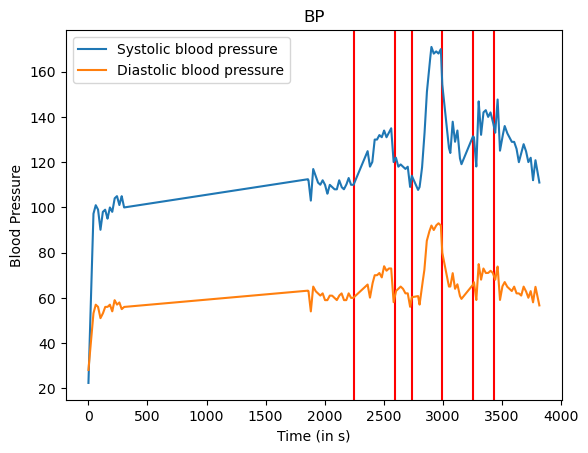

In [10]:
# Plot 
plt.figure(1)
plt.axvline(time[716], color = 'r')
plt.axvline(time[1002], color = 'r')
plt.axvline(time[1145], color = 'r')
plt.axvline(time[1469], color = 'r')
plt.axvline(time[1599], color = 'r')
plt.axvline(time[1890], color = 'r')
plt.xlabel('Time (in s)')
plt.ylabel('Blood Pressure')
plt.title('BP')
plt.plot(time, bp_sys_int, label =  "Systolic blood pressure")
plt.plot(time, bp_dia_int, label = "Diastolic blood pressure")
plt.legend()
plt.show()

plt.figure(2)
plt.axvline(time[716], color = 'r')
plt.axvline(time[1002], color = 'r')
plt.axvline(time[1145], color = 'r')
plt.axvline(time[1469], color = 'r')
plt.axvline(time[1599], color = 'r')
plt.axvline(time[1890], color = 'r')
plt.xlabel("Time (in s)")
plt.ylabel("Filtered PAT")
plt.plot(time, PAT_filt_int)
plt.show()

### Fill missing values with  local mean

In [7]:
bp_systolic = df['blood pressure_systolic']
bp_systolic_mean = df['blood pressure_mean']
pat_raw = df['wrist@(9mm,809nm)_raw_pat']
pat_filtred = df['wrist@(9mm,809nm)_filtered_pat_bottomTI']

In [30]:
def fill_nan_mean(col_name, window):
    # Removing columns with NaN in the  coloumn
    data_squashed = df.dropna(subset=[col_name])
    rolling_mean = data_squashed[col_name].rolling(window).mean()
    df[col_name] = df[col_name].fillna(rolling_mean)
    print("Updated dataframe:")
    print(df[col_name].head())
    
    return df

In [33]:
rol_mean = fill_nan_mean('blood pressure_systolic', 200)

Updated dataframe:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: blood pressure_systolic, dtype: float64


Text(0.5, 1.0, 'Moving mean')

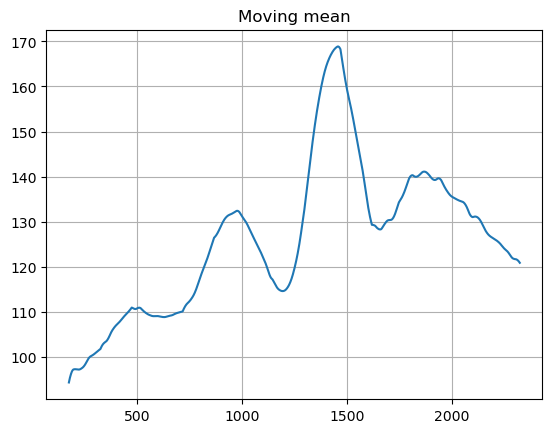

In [22]:
# Moving mean and standard deviation
window = 150

plt.figure(4)
rolling_mean = bp_systolic.rolling(window).mean()
plt.plot(rolling_mean)
plt.grid(True)
plt.title('Moving mean')

In [25]:
rolling_mean.info()
rolling_mean.shape

<class 'pandas.core.series.Series'>
RangeIndex: 2342 entries, 0 to 2341
Series name: blood pressure_systolic
Non-Null Count  Dtype  
--------------  -----  
2153 non-null   float64
dtypes: float64(1)
memory usage: 18.4 KB


(2342,)

### Autocorrelation plot

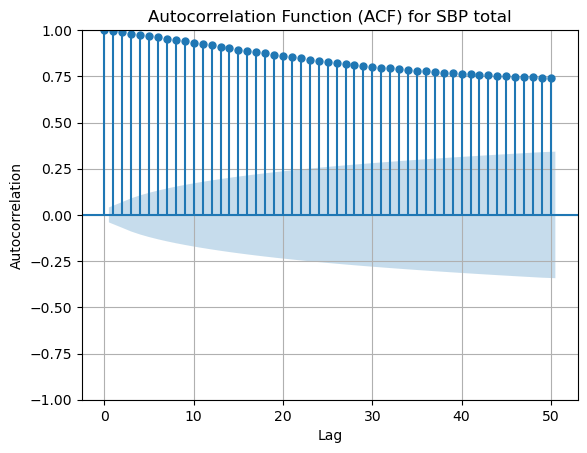

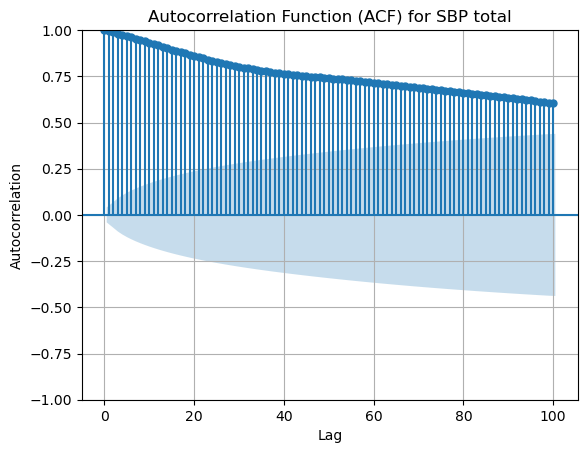

In [35]:
# ACF plot
from statsmodels.graphics.tsaplots import plot_acf

lag_array = [50,100] 

for i  in range(len(lag_array)):
    
    plot_acf(bp_sys_int, lags=lag_array[i])
    
    

    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

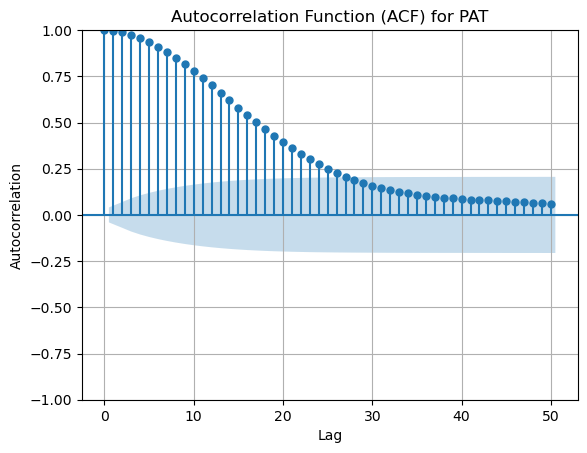

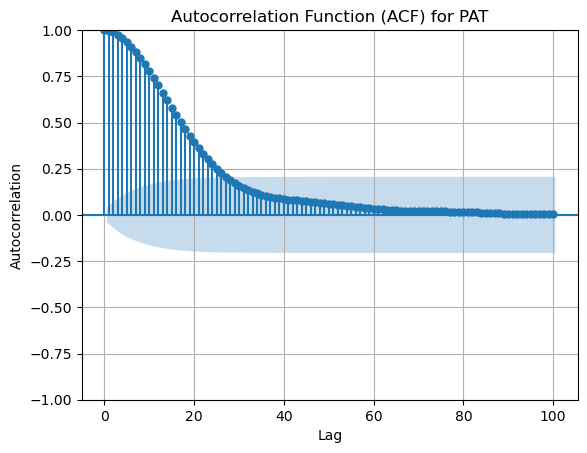

In [7]:
# ACF plot
from statsmodels.graphics.tsaplots import plot_acf

lag_array = [50,100] 

for i  in range(len(lag_array)):
    
    plot_acf(PAT_filt_int, lags=lag_array[i])
    
    
    plt.title("Autocorrelation Function (ACF) for PAT")
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

Autocorrelation values are close to 0 means values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively. From this: can conclude that the systolic blood pressure timme series are highly correlated.Blue shade region = 95% confidence region.

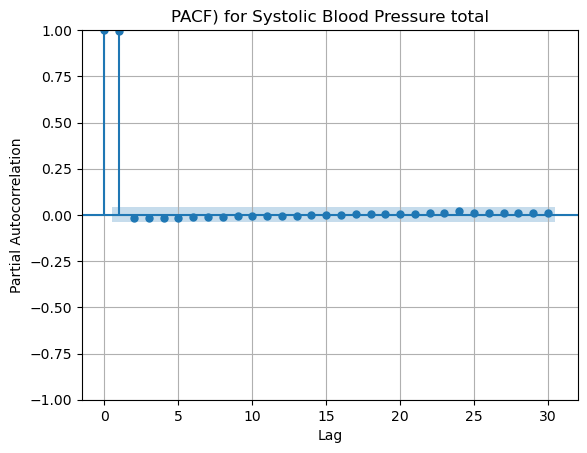

In [38]:
from statsmodels.graphics.tsaplots import plot_pacf

    
plot_pacf(bp_sys_int, lags=30)


plt.title("PACF) for Systolic Blood Pressure total")
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()
plt.show()

### Pearson Correlation Coefficient

As with other correlation coefficients, Pearson correlation is used to compute the strength of linear correlation between two variables in a dataset. It’s basically the ratio between the covariance of the variables and the product of their standard deviations, and gives a normalised measure of covariance that returns a value between 1 and -1. A value of 1 indicates a perfect positive linear relationship, a value of -1 indicates a perfect negative linear relationship, and a value of 0 indicates no linear relationship.

In [48]:
print("Correlation coefficien between BP systolic and Filtered Pat: ",bp_systolic.corr(pat_filtred))


Correlation coefficien between BP systolic and Filtered Pat:  -0.29303732899327645


Text(0.5, 1.0, 'PAT vs Systolic BP')

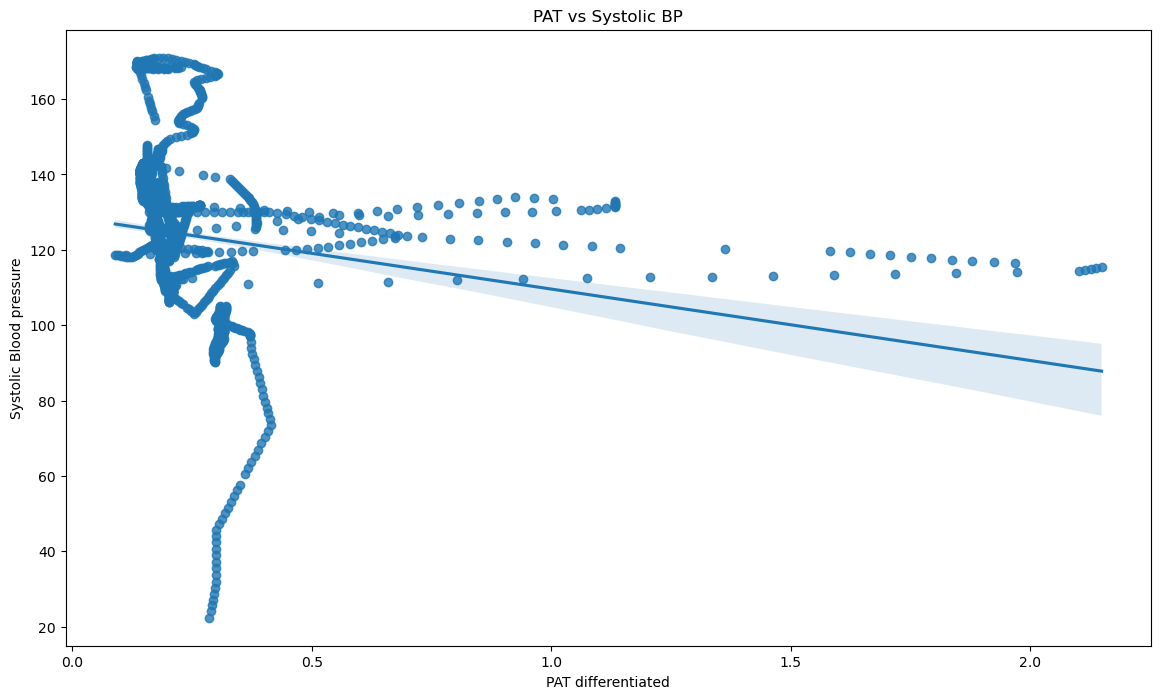

In [14]:
import seaborn as sns
plt.figure(figsize=(14,8))
#sns.regplot(x=bp_systolic,y = pat_filtred)
sns.regplot(x= PAT_filt_int,y =bp_sys_int )
plt.xlabel("PAT differentiated")
plt.ylabel("Systolic Blood pressure")
plt.title('PAT vs Systolic BP')

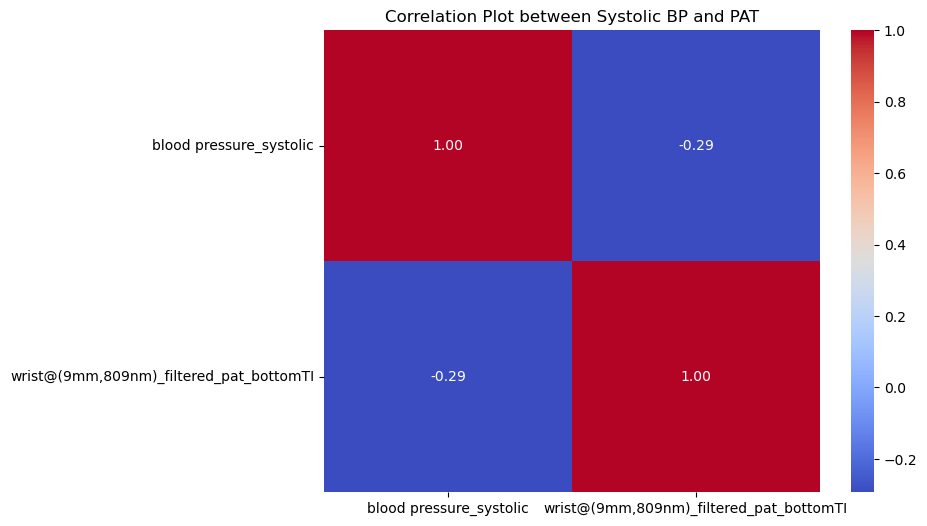

In [13]:
correlation_matrix = df[['blood pressure_systolic', 'wrist@(9mm,809nm)_filtered_pat_bottomTI']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot between Systolic BP and PAT')
plt.show()
